In [1]:
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to
%matplotlib inline

In [2]:
#parse_dates=["pickup_datetime"]
# train_df =  pd.read_csv('train.csv', nrows = 2_000_000, parse_dates=["pickup_datetime"])
train_df = pd.read_csv("train.csv", nrows = 2000000)
test_df = pd.read_csv("test.csv")
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [3]:
train_origin = train_df.copy()
test_origin = test_df.copy()

In [4]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
train_df.shape

(2000000, 8)

In [6]:
test_df.shape

(9914, 7)

### null 값 제거

In [7]:
train_df.isnull().sum().sort_values(ascending=False)

dropoff_latitude     14
dropoff_longitude    14
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [8]:
test_df.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [9]:
train_df = train_df.drop(train_df[train_df.isnull().any(1)].index, axis = 0)

In [10]:
train_df.shape

(1999986, 8)

In [11]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06
mean,1.134768e+01,-7.252324e+01,3.992965e+01,-7.252395e+01,3.992808e+01,1.684125e+00
std,9.852609e+00,1.286798e+01,7.983330e+00,1.277497e+01,1.032382e+01,1.314979e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


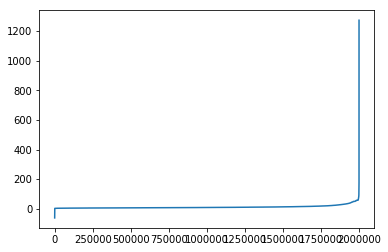

In [12]:
(train_df['fare_amount'].sort_values()).reset_index(drop=True).plot()

In [13]:
train_df['fare_amount'].describe()

count    1.999986e+06
mean     1.134768e+01
std      9.852609e+00
min     -6.200000e+01
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

### 요금이 100보다 큰 값 삭제

In [14]:
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.fare_amount<100]
print('New size: %d' % len(train_df))

Old size: 1999986
New size: 1999129


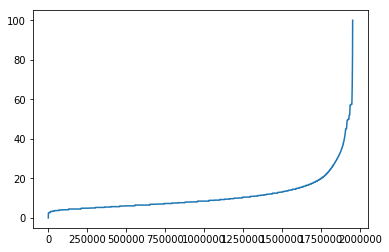

In [63]:
(train_df['fare_amount'].sort_values()).reset_index(drop=True).plot()

### 요금이 0보다 작은 값 삭제

In [16]:
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.fare_amount>=0]
print('New size: %d' % len(train_df))

Old size: 1999129
New size: 1999052


### 승객 이상치 제거

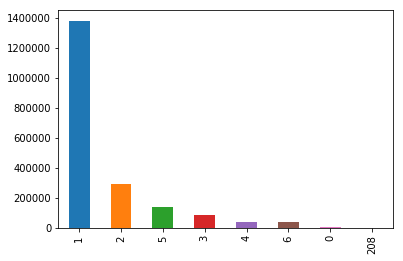

In [17]:
import matplotlib.pyplot as plt
train_df.passenger_count.value_counts().plot.bar()

In [18]:
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.passenger_count<=6]
train_df = train_df[train_df.passenger_count>0]
print('New size: %d' % len(train_df))

Old size: 1999052
New size: 1991942


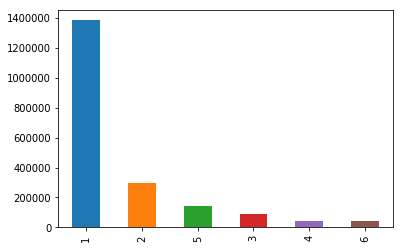

In [19]:
train_df.passenger_count.value_counts().plot.bar()

### 탑승 위치 이상치 삭제

In [20]:
train_df.loc[((train_df['pickup_latitude']==0) & (train_df['pickup_longitude']==0))
          &((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) & (train_df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
897211,2015-04-08 00:47:30.0000001,0.0,2015-04-08 00:47:30 UTC,0.0,0.0,-73.937698,40.758118,1
1833544,2015-05-01 01:49:29.0000003,0.0,2015-05-01 01:49:29 UTC,0.0,0.0,-74.001106,40.752079,1


In [21]:
train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']==0)&
                                       (train_df['pickup_longitude']==0))&
                                      ((train_df['dropoff_latitude']!=0) & (train_df['dropoff_longitude']!=0)) &
                                      (train_df['fare_amount']==0)].index, axis=0)

### 위도경도 0인 것들 모두 삭제

(array([0.000000e+00, 0.000000e+00, 9.570000e+02, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 6.100000e+01, 3.752900e+04, 0.000000e+00,
        1.000000e+00, 2.500000e+02, 1.953101e+06, 2.000000e+00,
        2.000000e+00, 2.000000e+00, 0.000000e+00]),
 array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
          10,   20,   30,   40,   50,   60,   70,   80,   90]),
 <a list of 19 Patch objects>)

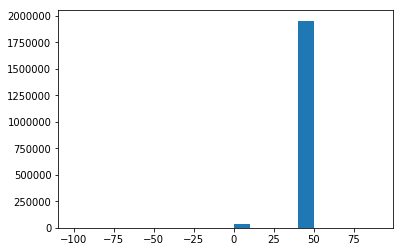

In [22]:
plt.hist(train_df['pickup_latitude'], bins = np.arange(-100, 100, 10))

(array([5.000000e+00, 6.000000e+00, 1.953079e+06, 1.300000e+01,
        3.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 2.790000e+02, 3.755000e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 9.580000e+02, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00]),
 array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
          10,   20,   30,   40,   50,   60,   70,   80,   90]),
 <a list of 19 Patch objects>)

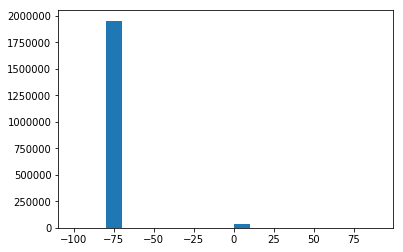

In [23]:
plt.hist(train_df['pickup_longitude'], bins = np.arange(-100, 100, 10))

(array([0.000000e+00, 0.000000e+00, 9.550000e+02, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 6.300000e+01, 3.750000e+04, 0.000000e+00,
        2.000000e+00, 2.780000e+02, 1.953098e+06, 3.000000e+00,
        0.000000e+00, 5.000000e+00, 1.000000e+00]),
 array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
          10,   20,   30,   40,   50,   60,   70,   80,   90]),
 <a list of 19 Patch objects>)

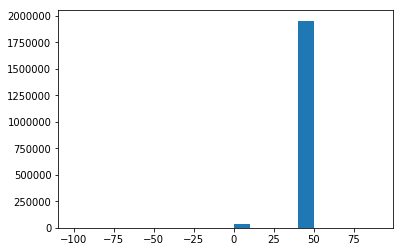

In [24]:
plt.hist(train_df['dropoff_latitude'], bins = np.arange(-100, 100, 10))

(array([2.000000e+00, 6.000000e+00, 1.953178e+06, 1.000000e+01,
        5.000000e+00, 2.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 2.290000e+02, 3.750900e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 9.570000e+02, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00]),
 array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
          10,   20,   30,   40,   50,   60,   70,   80,   90]),
 <a list of 19 Patch objects>)

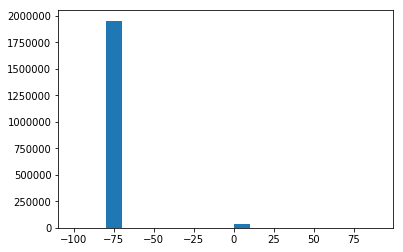

In [25]:
plt.hist(train_df['dropoff_longitude'], bins = np.arange(-100, 100, 10))

### 위도 경도 범위 이상치 제거
- 위도 값의 범위 : +90.00000(North)북위 90도 ~ -90.000000(South)남위 90도
- 경도 값의 범위 : +180.000000(East)동경 180도 ~ -180.000000(West)서경 180도
- 위도 50 

In [26]:
print('Old size: %d' % len(train_df))
train_df = train_df[train_df['pickup_latitude'] > 25]
train_df = train_df[train_df['pickup_longitude'] < - 50]
print('new size: %d' % len(train_df))
train_df = train_df[train_df['dropoff_latitude'] > 25]
train_df = train_df[train_df['dropoff_longitude'] < -50]
print('new size: %d' % len(train_df))

Old size: 1991940
new size: 1953077
new size: 1951220


In [27]:
print('Old size: %d' % len(test_df))
test_df = test_df[test_df['pickup_latitude'] > 25]
test_df = test_df[test_df['pickup_longitude'] < - 50]
print('new size: %d' % len(test_df))
test_df = test_df[test_df['dropoff_latitude'] > 25]
test_df = test_df[test_df['dropoff_longitude'] < -50]
print('new size: %d' % len(test_df))

Old size: 9914
new size: 9914
new size: 9914


### 년,월,일,시간,요일 분할

In [28]:
train_df['pickup_datetime'].replace(regex=True,inplace=True,to_replace=' UTC',value=r'')
test_df['pickup_datetime'].replace(regex=True,inplace=True,to_replace=' UTC',value=r'')
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], format='%Y-%m-%d')
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], format='%Y-%m-%d')

In [29]:
data = [train_df,test_df]

for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [30]:
train_df[train_df.columns[-5:]].head()

,Year,Month,Date,Day of Week,Hour
0,2009,6,15,0,17
1,2010,1,5,1,16
2,2011,8,18,3,0
3,2012,4,21,5,4
4,2010,3,9,1,7


In [31]:
train_df.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
dtype: object

### 미국 공휴일 찾아주는 함수

In [32]:
# #check holiday
# from pandas.tseries.holiday import USFederalHolidayCalendar #엄청 유용할듯
# cal = USFederalHolidayCalendar()
# #holidays = cal.holidays(start='2009-01-01', end='2015-12-31').to_pydatetime()
# holidays = cal.holidays(start='2009-01-01', end='2015-12-31')

# train_df['holiday_or_not'] = train_df.pickup_datetime.apply(lambda x: 1 if x in holidays else 0)
# test_df['holiday_or_not'] = test_df.pickup_datetime.apply(lambda x: 1 if x in holidays else 0)

### 위도 경도 이용 거리 계산 함수

In [33]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train_df, test_df]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [34]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [35]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157


In [36]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323260
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


### 이동거리 이상치 확인

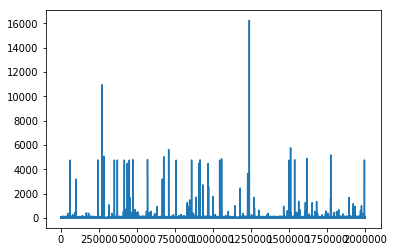

In [37]:
train_df.H_Distance.plot()

In [38]:
train_df.H_Distance.describe()

count    1.951220e+06
mean     3.461578e+00
std      2.385572e+01
min      0.000000e+00
25%      1.253826e+00
50%      2.152965e+00
75%      3.916756e+00
max      1.624489e+04
Name: H_Distance, dtype: float64

In [39]:
train_df.loc[(train_df['H_Distance']>140)&(train_df['fare_amount']!=0)].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
45139,2015-06-04 14:24:03.0000005,57.54,2015-06-04 14:24:03,-70.140793,38.754215,-73.789780,40.646969,1,2015,6,4,3,14,376.445536
46482,2011-03-18 17:35:27.0000002,45.00,2011-03-18 17:35:27,-75.336082,40.646409,-73.953539,39.606622,1,2011,3,18,4,17,164.874362
60442,2012-01-12 13:36:00.000000186,4.90,2012-01-12 13:36:00,-736.550000,40.738230,-73.988742,40.748847,1,2012,1,12,3,13,4747.973805
73775,2010-11-04 22:02:00.000000193,10.10,2010-11-04 22:02:00,-73.947407,40.706902,-73.041317,39.296307,1,2010,11,4,3,22,174.808107
78167,2012-12-24 14:20:00.00000043,4.50,2012-12-24 14:20:00,-74.000950,43.183332,-73.995082,40.749792,6,2012,12,24,0,14,270.597736


In [40]:
train_df.loc[(train_df['H_Distance']>140)&(train_df['fare_amount']!=0)].count()

key                  140
fare_amount          140
pickup_datetime      140
pickup_longitude     140
pickup_latitude      140
dropoff_longitude    140
dropoff_latitude     140
passenger_count      140
Year                 140
Month                140
Date                 140
Day of Week          140
Hour                 140
H_Distance           140
dtype: int64

In [41]:
print('Old size: %d' % len(train_df))
train_df = train_df[train_df['H_Distance'] < 140]
print('new size: %d' % len(train_df))

Old size: 1951220
new size: 1951080


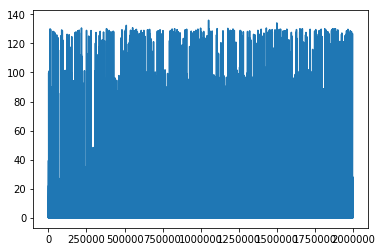

In [42]:
train_df.H_Distance.plot()

### 이동거리가 0인 것 확인
- 거리가 0 삭제 시 예측이 더 안된다

In [43]:
# train_df.sort_values(['H_Distance','fare_amount'], ascending=False)

In [44]:
# train_df.loc[((train_df['pickup_latitude']==train_df['dropoff_latitude']) & (train_df['pickup_longitude']==train_df['dropoff_longitude']))]

In [45]:
# print(len(train_df))
# train_df = train_df.drop(train_df.loc[((train_df['pickup_latitude']==train_df['dropoff_latitude']) &
#                                        (train_df['pickup_longitude']==train_df['dropoff_longitude']))].index, axis=0)
# print(len(train_df))

### 승객수에 따른 요금

Text(0,0.5,'Frequency')

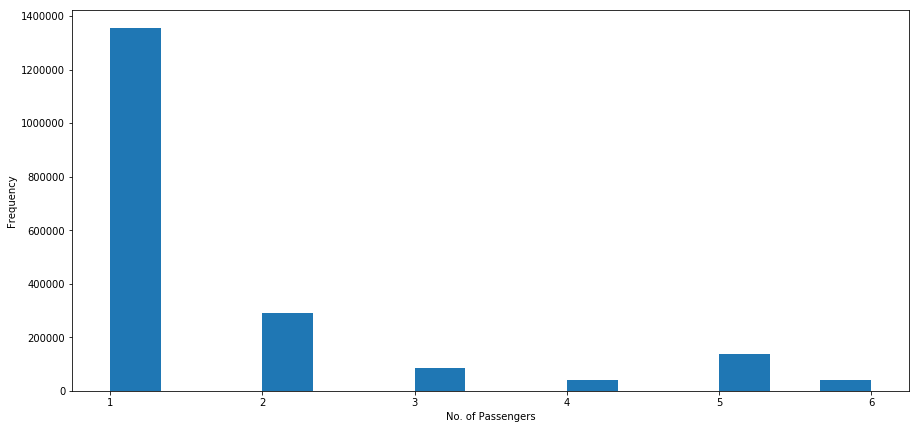

In [46]:
plt.figure(figsize=(15,7))
plt.hist(train_df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

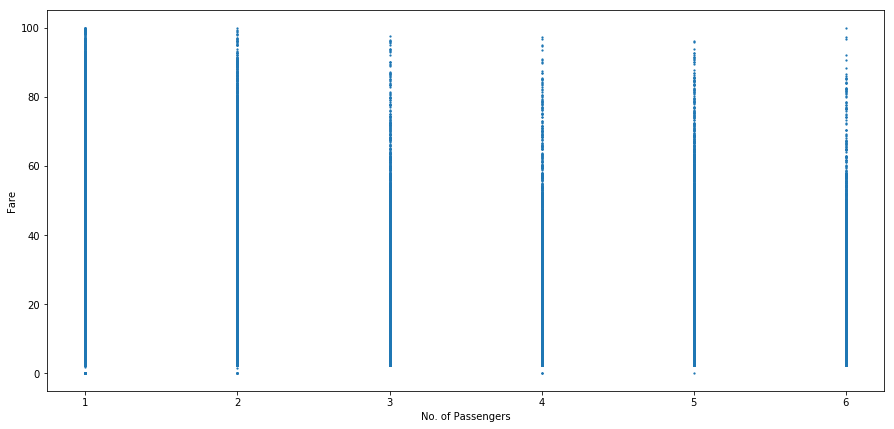

In [47]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['passenger_count'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

- 1명이 탈 때 제일 비용이 높게 나온다

### 날짜에 따른 요금 비교

Text(0,0.5,'Fare')

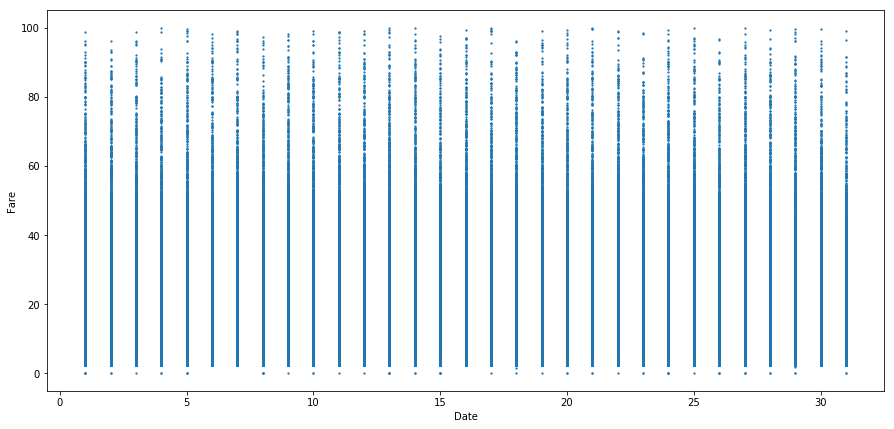

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_df['Date'], y=train_df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

-  거의 비슷

### 시간에 따른 요금 비교

Text(0,0.5,'Frequency')

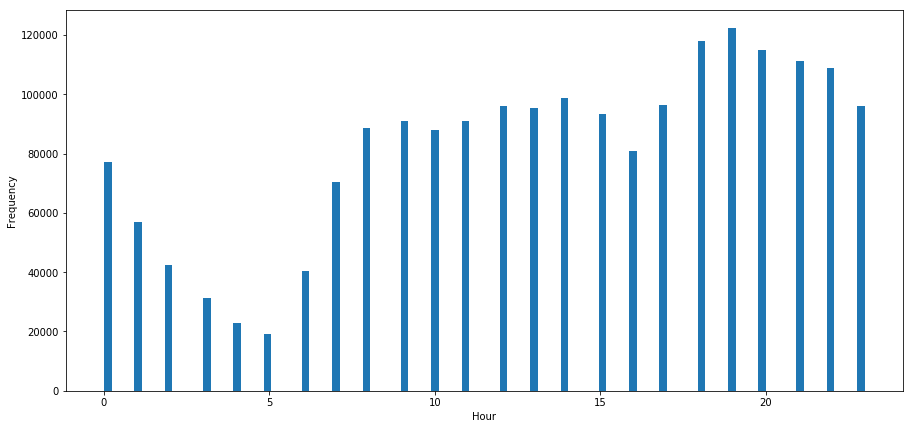

In [49]:
plt.figure(figsize=(15,7))
plt.hist(x=train_df.Hour, bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

- 택시 이용 시간 오전 5시 가장 낮고 오후 7시에 가장 높다

### 요일별 이용 회수

Text(0,0.5,'Frequency')

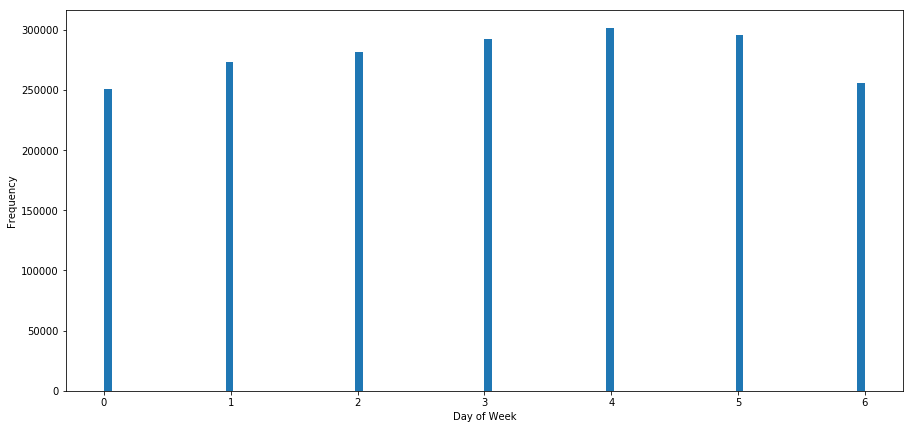

In [50]:
plt.figure(figsize=(15,7))
plt.hist(train_df['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

### 요일별 요금

Text(0,0.5,'fare_amount')

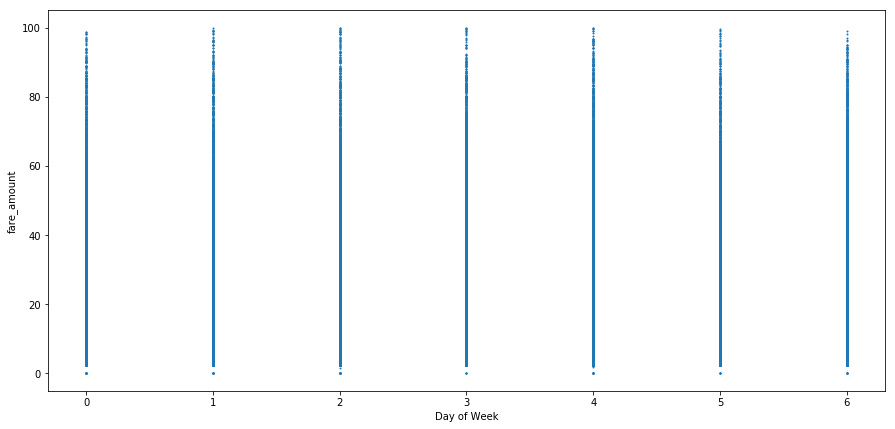

In [51]:
plt.figure(figsize=(15,7))
plt.scatter(x = train_df['Day of Week'], y=train_df['fare_amount'], s=1.0)
plt.xlabel('Day of Week')
plt.ylabel('fare_amount')

In [52]:
train_df = train_df.drop(['pickup_datetime'], axis=1)
test_df = test_df.drop(['pickup_datetime'], axis=1)
test_df.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323260
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [53]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157


### reset_index

In [54]:
train_df.reset_index(drop=True)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,2009-06-15 17:26:21.0000001,4.50,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,2010-01-05 16:52:16.0000002,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,2011-08-18 00:35:00.00000049,5.70,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.0000001,7.70,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157
5,2011-01-06 09:50:45.0000002,12.10,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,3,9,3.787239
6,2012-11-20 20:35:00.0000001,7.50,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,1,20,1.555807
7,2012-01-04 17:22:00.00000081,16.50,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,2,17,4.155444
8,2012-12-03 13:10:00.000000125,9.00,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,0,13,1.253232
9,2009-09-02 01:11:00.00000083,8.90,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2,1,2.849627


In [55]:
X_train = train_df[train_df.columns[2:]]
y_train = train_df[train_df.columns[1]]
x = test_df[test_df.columns[1:]]

In [56]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

In [57]:
X_train.shape, x_test.shape, y_train.shape, y_test.shape

((1365756, 11), (585324, 11), (1365756,), (585324,))

### Linear Regression
- 5.46885점

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(x_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

6.010264607221682


In [59]:
y_pred = lin_reg.predict(x)
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': y_pred},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

### RandomForestRegressor
- 4.74595 (n_estimators=20)
- 3.19085 (n_estimators=25, max_features=11, max_depth=25, min_samples_split=3, min_samples_leaf=2, random_state=0)
- 파라미터 튜닝하면 더 좋아 질 것 같다

### Parameters currently in use:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfModel = RandomForestRegressor(n_estimators=25, max_features=11, max_depth=25, min_samples_split=3, min_samples_leaf=2,
                                verbose=1, random_state=0)
rfModel.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  6.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=0,
           verbose=1, warm_start=False)

In [61]:
preds = rfModel.predict(x_test)
error = np.sqrt(mean_squared_error(y_test, preds))
print(error)

3.4779494209179456


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.9s finished


In [62]:
preds = rfModel.predict(x)
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': preds},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


### Hyperparameter Tuning the Random Forest in Python
- To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [61]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [10, 20, 30]}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
random_grid =  {'bootstrap': [True, False],
                'max_depth': [10, 20, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [10, 20]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

In [ ]:
preds = rfModel.predict(x_test)
error = np.sqrt(mean_squared_error(y_test, preds))
print(error)

In [ ]:
preds = rfModel.predict(x)
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': preds},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

### ElasticNet
- 5.46871

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [64]:
elastic_net = ElasticNet(alpha=0.00001, l1_ratio=0.5)

elastic_net.fit(X_train, y_train)
prediction = elastic_net.predict(x_test)

error = np.sqrt(mean_squared_error(y_test, prediction))
print(error)

8.70866990952789


In [ ]:
prediction = elastic_net.predict(x)
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': prediction},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

### lightGBM
- 3.36301

In [50]:
import lightgbm as lgbm

In [51]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [52]:
pred_test_y = np.zeros(x_test.shape[0])
pred_test_y.shape

(292793,)

In [54]:
train_set = lgbm.Dataset(X_train, y_train, silent=True)
train_set

In [55]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [57]:
prediction = model.predict(x_test, num_iteration = model.best_iteration)
error = np.sqrt(mean_squared_error(y_test, prediction))
print(error)

3.9505596992517584


In [58]:
pred_test_y = model.predict(x, num_iteration = model.best_iteration)
submission['fare_amount'] = pred_test_y
submission.to_csv('submission_LGB.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.795788
1,2015-01-27 13:08:24.0000003,10.583176
2,2011-10-08 11:53:44.0000002,4.764344
3,2012-12-01 21:12:12.0000002,8.480174
4,2012-12-01 21:12:12.0000003,15.450434
5,2012-12-01 21:12:12.0000005,11.215139
6,2011-10-06 12:10:20.0000001,5.442606
7,2011-10-06 12:10:20.0000003,48.849756
8,2011-10-06 12:10:20.0000002,12.185717
9,2014-02-18 15:22:20.0000002,6.843534


### XGBM
- 3.53635

In [60]:
import xgboost as xgb

In [66]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(x_test)
rtest = xgb.DMatrix(x)

In [63]:
#set parameters for xgboost
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [64]:
xb = xgb.train(params, dtrain, num_rounds)

In [65]:
y_pred_xgb = xb.predict(dtest)
error = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(error)

4.16665597619012


In [67]:
y_pred_xgb = xb.predict(rtest)
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': y_pred_xgb},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)